In [4]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def display(image, flip=True, cmap=None, figsize=(6, 6), **kwargs):
    if flip:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # image.shape = (hieght, width, channels)
    width=image.shape[1] 
    height=image.shape[0]
    margin=50 
    # dots per inch
    dpi=100.
    # inches
    figsize=((width+2*margin)/dpi, (height+2*margin)/dpi)
    #axes ratio
    left = margin/dpi/figsize[0] 
    bottom = margin/dpi/figsize[1]
    fig = plt.figure(figsize=figsize, dpi=dpi)
    fig.subplots_adjust(left=left, bottom=bottom, right=1.-left, top=1.-bottom)
    # plt.figure(figsize=(6, 6))
    _ = plt.imshow(image, cmap=cmap)
    plt.title(kwargs.get("title", None))
    plt.axis("off")

### Erosion

- Definition - https://docs.opencv.org/2.4/doc/tutorials/imgproc/erosion_dilatation/erosion_dilatation.html
- Erosion - https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=erode#erode

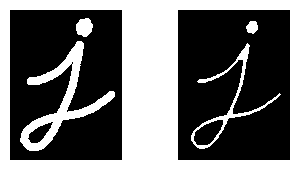

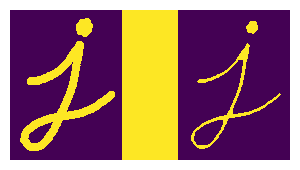

In [54]:
image = cv2.imread("images/j.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
display(image)
display(gray, flip=False)

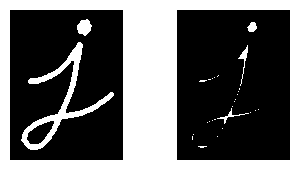

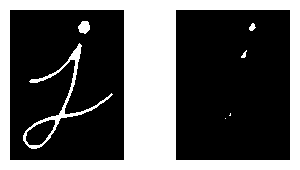

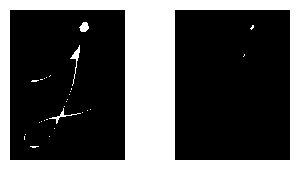

In [18]:
# erode the image 3 times

for i in range(0, 3):
    eroded = cv2.erode(gray.copy(), None, iterations=i+1)
    display(eroded, flip=False, cmap="gray")

### Dilation

- https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=dilate#dilate

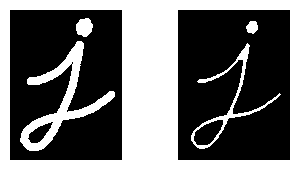

In [23]:
image = cv2.imread("images/j.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
display(image)

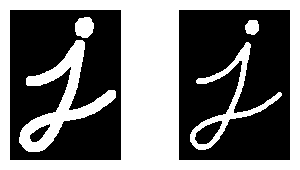

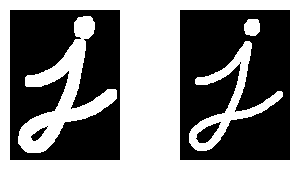

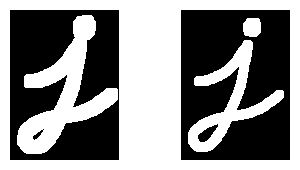

In [24]:
# apply dilation 3 times 
for i in range(0, 3):
    dilated = cv2.dilate(gray.copy(), None, iterations=i+1)
    display(dilated, flip=False, cmap="gray")

### Opening

An opening is an **Erosion followed by a Dilation**

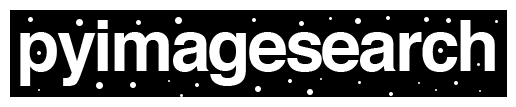

In [45]:
image = cv2.imread("images/pyimagesearch_noise.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
display(image)

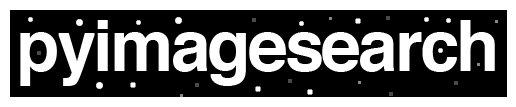

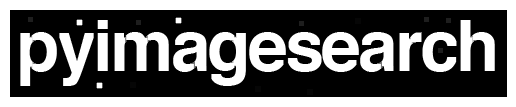

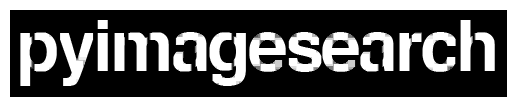

In [46]:
# apply Opening operation with different kernel sizes

kernels = [(3, 3), (5, 5), (7, 7)]

for k in kernels:
    # get the structuring element
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, k)
    # apply opening
    opening = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
    display(opening, flip=False, cmap="gray")
    

### Closing

A Closing is a **Dilation followed by an Erosion**

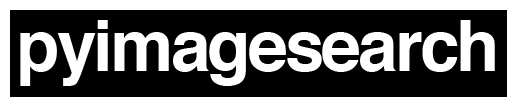

In [49]:
image = cv2.imread("images/pyimagesearch_logo.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
display(gray, flip=False, cmap="gray")

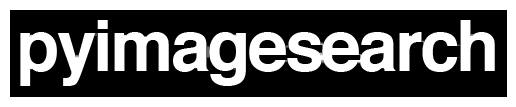

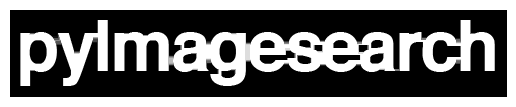

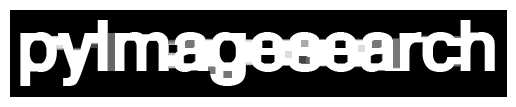

In [50]:
# perform closing

kernels = [(3, 3), (5, 5), (7, 7)]

for k in kernels:
    # get the structured element
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, k)
    # close
    closing = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)
    display(closing, flip=False, cmap="gray")

### Morphological Gradient

A morphological gradient is the **difference between the dilation and erosion**. It is useful for determining the outline of a particular object of an image:


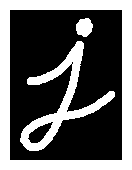

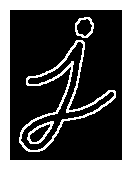

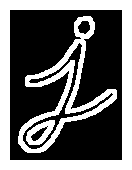

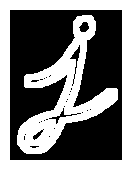

In [55]:
# perform closing
image = cv2.imread("images/j2.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
display(image)
kernels = [(3, 3), (5, 5), (7, 7)]

for k in kernels:
    # get the structured element
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, k)
    # close
    closing = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, kernel)
    display(closing, flip=False, cmap="gray")

### Top Hat / White Hat

A top hat (also known as a white hat) morphological operation is the **difference between the original (grayscale/single channel) input image and the opening**.

A top hat operation is used to reveal **bright regions** of an image on **dark backgrounds**.



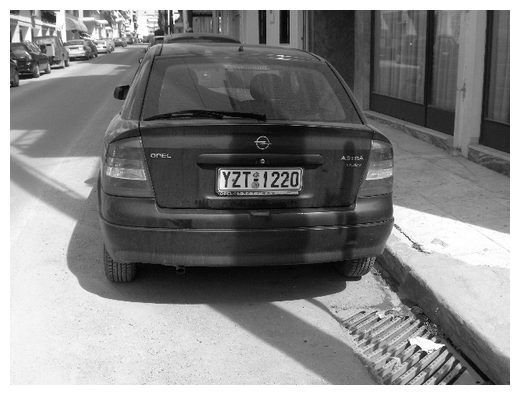

In [61]:
image = cv2.imread("images/car.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
display(gray, flip=False, cmap="gray")

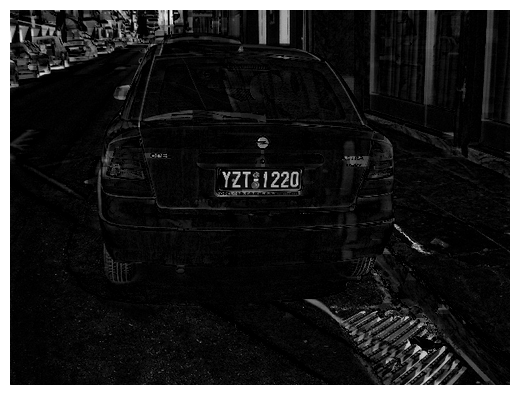

In [74]:
# because we can see the liscence plate is rectangular and is roughly 3x wider than it is tall!! 
kernel_size = (13, 5)

# construct a rectangular kernel
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)

# apply blackhat
blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, kernel)
display(blackhat, flip=False, cmap="gray")

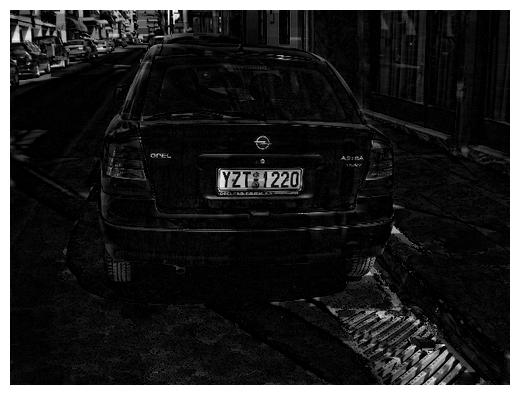

In [75]:
# apply tophat 
tophat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, kernel)
display(tophat, flip=False, cmap="gray")